## 데이터 다루기

### 피마 인디언 당뇨병 예측 사례<br>
- 딥러닝을 구동하려면 반드시 속성과 클래스를 먼저 구분<br><br>

- 모델의 정확도를 향상시키기 위해서는 데이터의 추가 및 재가공이 필요할 수 있음<br><br>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../dataset/pima-indians-diabetes.csv",
                 names = ["pregnant", "plasma", "pressure", "thickness", "insulin",
                         "BMI", "pedigree", "age", "class"])

df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(df.describe())

         pregnant      plasma    pressure   thickness     insulin         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [4]:
# 데이터중 임신 횟수와 당뇨병 발병여부 확인
print(df[['pregnant', 'class']])

     pregnant  class
0           6      1
1           1      0
2           8      1
3           1      0
4           0      1
..        ...    ...
763        10      0
764         2      0
765         5      0
766         1      1
767         1      0

[768 rows x 2 columns]


In [6]:
# 임신횟수와 당뇨병 발병여부를 임신횟수로 그룹한 후 
# 임신 횟수 별로 당뇨병 발병여부 평균
df[['pregnant', 'class']]\
.groupby(['pregnant'], as_index=False)\
.mean().sort_values(by='pregnant', ascending=True) 

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


### 상관관계 확인

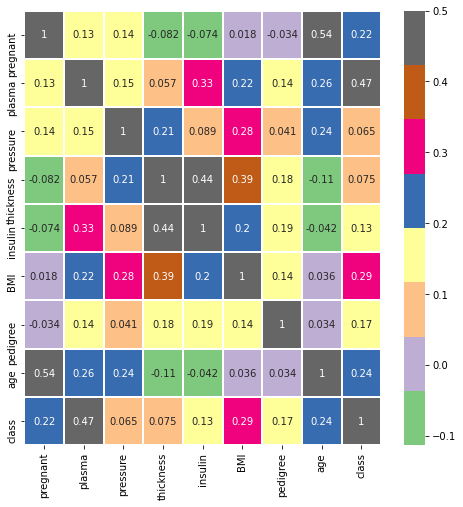

In [8]:
plt.figure(figsize = (8, 8))

sns.heatmap(df.corr(),linewidths = 0.1, vmax = 0.5, cmap = 'Accent', 
            linecolor = 'white', annot = True)
plt.show()

- plasma 항목(공복 혈당 농도)가 class(당뇨병 발병 여부)항목과 가장 상관관계 높음

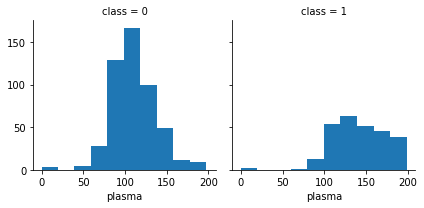

In [9]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy 
import tensorflow as tf


numpy.random.seed(3)
tf.random.set_seed(3)

df = pd.read_csv("../dataset/pima-indians-diabetes.csv", header=None)

dataset = df.values
print(dataset)

X = dataset[:, 0:8]
Y = dataset[:, 8]

model = Sequential()
model.add(Dense(12, input_dim = X.shape[1], activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model.fit(X, Y, epochs = 200, batch_size = 10)

print()
print("Accuracy: %.4f" %  (model.evaluate(X, Y)[1]))
print()
print("loss : %.4f" % (model.evaluate(X, Y)[0]))

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]
Epoch 1/200
77/77 [==============================] - 1s 1ms/step - loss: 10.5440 - accuracy: 0.6159
Epoch 2/200
77/77 [==============================] - 0s 1ms/step - loss: 5.4367 - accuracy: 0.6029
Epoch 3/200
77/77 [==============================] - 0s 1ms/step - loss: 2.9292 - accuracy: 0.5208
Epoch 4/200
77/77 [==============================] - 0s 1ms/step - loss: 1.5346 - accuracy: 0.5208
Epoch 5/200
77/77 [==============================] - 0s 1ms/step - loss: 0.8896 - accuracy: 0.5000
Epoch 6/200
77/77 [==============================] - 0s 1ms/step - loss: 0.8072 - accuracy: 0.5234
Epoch 7/200
77/77 [==============================] - 0s 2ms/step - lo

77/77 [==============================] - 0s 1ms/step - loss: 0.5225 - accuracy: 0.7318
Epoch 80/200
77/77 [==============================] - 0s 938us/step - loss: 0.5092 - accuracy: 0.7435
Epoch 81/200
77/77 [==============================] - 0s 926us/step - loss: 0.5121 - accuracy: 0.7422
Epoch 82/200
77/77 [==============================] - 0s 906us/step - loss: 0.5087 - accuracy: 0.7461
Epoch 83/200
77/77 [==============================] - 0s 937us/step - loss: 0.5171 - accuracy: 0.7344
Epoch 84/200
77/77 [==============================] - 0s 945us/step - loss: 0.5120 - accuracy: 0.7305
Epoch 85/200
77/77 [==============================] - 0s 984us/step - loss: 0.5088 - accuracy: 0.7461
Epoch 86/200
77/77 [==============================] - 0s 957us/step - loss: 0.5046 - accuracy: 0.7513
Epoch 87/200
77/77 [==============================] - 0s 916us/step - loss: 0.5061 - accuracy: 0.7500
Epoch 88/200
77/77 [==============================] - 0s 979us/step - loss: 0.5073 - accuracy: 0.

77/77 [==============================] - 0s 991us/step - loss: 0.4785 - accuracy: 0.7643
Epoch 160/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4851 - accuracy: 0.7539
Epoch 161/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4796 - accuracy: 0.7695
Epoch 162/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4798 - accuracy: 0.7565
Epoch 163/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4780 - accuracy: 0.7643
Epoch 164/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4776 - accuracy: 0.7695
Epoch 165/200
77/77 [==============================] - 0s 984us/step - loss: 0.4839 - accuracy: 0.7591
Epoch 166/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.7760
Epoch 167/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.7721
Epoch 168/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4769 - accuracy: 0.7630


- 교차 엔트로피는 2개의 확률분포 간의 거리를 측정한 것<br><br>

- 교차 엔트로피가 크면, 2개의 확률 분포가 많이 다른 것이다. 교차 엔트로피가 작으면 2개의 확률 분포가 거의 일치 한다고 볼 수 있다.<br><br>

### train : 70 test : 30

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import numpy 
import tensorflow as tf


numpy.random.seed(3)
tf.random.set_seed(3)

df = pd.read_csv("../dataset/pima-indians-diabetes.csv", header=None)

dataset = df.values

train, test = train_test_split(dataset, test_size = 0.3)

X_train = train[:, 0:8]
Y_train = train[:, 8]
print(X_train.shape)
print(Y_train.shape)

model1 = Sequential()
model1.add(Dense(12, input_dim = X_train.shape[1], activation = 'relu'))
model1.add(Dense(8, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

model1.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model1.fit(X_train, Y_train, epochs = 200, batch_size = 10)

(537, 8)
(537,)
Epoch 1/200
54/54 [==============================] - 0s 1ms/step - loss: 11.7405 - accuracy: 0.6760
Epoch 2/200
54/54 [==============================] - 0s 1ms/step - loss: 7.6867 - accuracy: 0.6536
Epoch 3/200
54/54 [==============================] - 0s 1ms/step - loss: 5.1043 - accuracy: 0.5754
Epoch 4/200
54/54 [==============================] - 0s 1ms/step - loss: 3.4313 - accuracy: 0.5121
Epoch 5/200
54/54 [==============================] - 0s 1ms/step - loss: 2.3271 - accuracy: 0.5084
Epoch 6/200
54/54 [==============================] - 0s 1ms/step - loss: 1.5853 - accuracy: 0.5196
Epoch 7/200
54/54 [==============================] - 0s 1ms/step - loss: 1.0440 - accuracy: 0.5736
Epoch 8/200
54/54 [==============================] - 0s 1ms/step - loss: 0.8462 - accuracy: 0.5475
Epoch 9/200
54/54 [==============================] - 0s 1ms/step - loss: 0.7986 - accuracy: 0.5605
Epoch 10/200
54/54 [==============================] - 0s 1ms/step - loss: 0.7713 - accuracy:

54/54 [==============================] - 0s 1ms/step - loss: 0.5232 - accuracy: 0.7337
Epoch 83/200
54/54 [==============================] - 0s 1ms/step - loss: 0.5219 - accuracy: 0.7281
Epoch 84/200
54/54 [==============================] - 0s 913us/step - loss: 0.5252 - accuracy: 0.7281
Epoch 85/200
54/54 [==============================] - 0s 1ms/step - loss: 0.5244 - accuracy: 0.7374
Epoch 86/200
54/54 [==============================] - 0s 1ms/step - loss: 0.5180 - accuracy: 0.7393
Epoch 87/200
54/54 [==============================] - 0s 1ms/step - loss: 0.5193 - accuracy: 0.7281
Epoch 88/200
54/54 [==============================] - 0s 1ms/step - loss: 0.5240 - accuracy: 0.7374
Epoch 89/200
54/54 [==============================] - 0s 941us/step - loss: 0.5116 - accuracy: 0.7374
Epoch 90/200
54/54 [==============================] - 0s 931us/step - loss: 0.5208 - accuracy: 0.7412
Epoch 91/200
54/54 [==============================] - 0s 1ms/step - loss: 0.5344 - accuracy: 0.7225
Epoch 9

Epoch 163/200
54/54 [==============================] - 0s 1ms/step - loss: 0.4880 - accuracy: 0.7598
Epoch 164/200
54/54 [==============================] - 0s 1ms/step - loss: 0.4905 - accuracy: 0.7654
Epoch 165/200
54/54 [==============================] - 0s 1ms/step - loss: 0.4852 - accuracy: 0.7616
Epoch 166/200
54/54 [==============================] - 0s 1ms/step - loss: 0.4851 - accuracy: 0.7486
Epoch 167/200
54/54 [==============================] - 0s 1ms/step - loss: 0.4933 - accuracy: 0.7616
Epoch 168/200
54/54 [==============================] - 0s 979us/step - loss: 0.4988 - accuracy: 0.7542
Epoch 169/200
54/54 [==============================] - 0s 1ms/step - loss: 0.4960 - accuracy: 0.7467
Epoch 170/200
54/54 [==============================] - 0s 1ms/step - loss: 0.5005 - accuracy: 0.7412
Epoch 171/200
54/54 [==============================] - 0s 1ms/step - loss: 0.4782 - accuracy: 0.7561
Epoch 172/200
54/54 [==============================] - 0s 1ms/step - loss: 0.4885 - accur

In [46]:
x_test = test[:, 0:8]
y_test = test[:, 8]

score = model.evaluate(x_test, y_test, verbose = 1)
print("\n Accuracy: %.4f" % (score[1]))
print("\n loss: %.4f" % (score[0]))

[0.4764453172683716, 0.7445887327194214]
8/8 [==============================] - 0s 2ms/step - loss: 0.4764 - accuracy: 0.7446

 Accuracy: 0.7446

 loss: 0.4764


In [47]:
model.evaluate(x_test, y_test, verbose = 0)

[0.4764453172683716, 0.7445887327194214]

In [48]:
pred = model.predict(x_test)
pred

array([[1.73108906e-01],
       [7.55886912e-01],
       [4.39852476e-02],
       [9.33520675e-01],
       [6.20891571e-01],
       [3.94451886e-01],
       [1.34965241e-01],
       [4.31299210e-03],
       [2.72370279e-02],
       [3.12816799e-02],
       [8.32764030e-01],
       [3.93820107e-02],
       [9.20696557e-02],
       [7.36776114e-01],
       [5.40233433e-01],
       [5.60610890e-02],
       [4.06049222e-01],
       [7.07311928e-02],
       [3.99473101e-01],
       [4.60761428e-01],
       [1.65406734e-01],
       [1.05076224e-01],
       [1.32169247e-01],
       [5.36832035e-01],
       [6.12019300e-02],
       [6.88113570e-01],
       [2.32319832e-01],
       [2.61800379e-01],
       [5.04360795e-01],
       [2.94755995e-01],
       [7.38861620e-01],
       [3.57074440e-02],
       [3.76046360e-01],
       [7.19487667e-03],
       [2.32099891e-01],
       [2.13761598e-01],
       [1.35596752e-01],
       [1.75603926e-01],
       [3.46796870e-01],
       [7.14124978e-01],


In [55]:
pred.shape

(231, 1)

In [62]:
print("%.4f" % pred[3])

0.9335
